<a href="https://colab.research.google.com/github/Lovejeet-Singh-31/EDA-on-Airbnb-NYC-2019/blob/main/Airbnb_Bookings_Analysis_Capstone_Project_Solutions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

#**First thing first importing the necessary libraries for exploring and analyze the data. Following are the libraries:-**
1.   Pandas
2.   Numpy
3.   Matplotlib



In [1]:
#importing the libraries like Pandas,Numpy and Matplotlib.
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Now we are ready to mount the google drive using following code

In [2]:
#mounting google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#**After mounting the gdrive we are ready to load our dataset.**
#**AirBnB Booking dataset:-** 
In Airbnb dataset we have informations such as id, host id, hosts name along with their listing and price, neighbourhood, neighbourhood group, minimum nights, geographical coordinates, number of reviews, reviews per month and availability 365. 

In [3]:
#storing the path of the dataset in 'path' variable 
path = '/content/drive/MyDrive/Colab Notebooks/Airbnb Bookings Analysis - Lovejeet Singh/Copy of Airbnb NYC 2019.csv'

Now we ready to read our airbnb.csv file using pandas library funtion.  

In [4]:
#Reading the Airbnb.csv
air_bnb_df = pd.read_csv(path)

Now checking the shape of our DataFrame which helps to get an idea to know the number of rows and columns present in our DataFrame.

In [5]:
#checking the shape 
air_bnb_df.shape

(48895, 16)

Using info() method we can easily get the idea of what kind of data type and null values inside the Airbnb DataFrame we have

In [6]:
#checking the info 
air_bnb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

Using the info method we can see that we have missing/Null values in 4 columns which are 'name' , 'host_name' , 'last_review' and 'review_per_month'. So let's find out total number of missing values in each column using isna() method

In [7]:
#calculating the null or missing values 
air_bnb_df.isna().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

Lets check out what kind of columns we have using columns function

In [8]:
#geting the columns name inside our airbnb dataframe
air_bnb_df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

Now we can see the numeric value and its aggregations like mean,mode,max and median using Describe method

In [9]:
#checking the mean mode and median 
air_bnb_df[['price','minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


Now checking our dataframe using head() function to see how dataframe look like 

In [10]:
#using head() function we able to view top 5 rows 
air_bnb_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


Getting only those columns which is necessary for our analysis. 

In [11]:
#selecting those column which are important. 
air_bnb_df = air_bnb_df[['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood','room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365']]

Now making a copy of this dataframe for safety perpose or furthur use.

In [12]:
#making a copy of our dataframe
airbnb_df = air_bnb_df.copy()

Now we successfully filtered our dataframe and now we know what type of information our dataset holds and get an idea of what kind of information we are looking for inside our dataframe. So let's begin our analysis on Airbnb dataframe. 

#**What can we learn about different hosts and areas?**

Perform groupby function on host_name and areas and aggregation funtion on calculated_host_listings_count. we get the result, which tells us about the host_name and total number of listed properties at different neighbourhood_group.

In [13]:
#performing groupby on host_name and neighbourhood_group 
hosts_areas = airbnb_df.groupby(['host_name','neighbourhood_group'])['calculated_host_listings_count'].max().reset_index()

In [14]:
#sorting values by calculated_host_listings_count
hosts_areas_df = hosts_areas.sort_values(by='calculated_host_listings_count',ascending=False).set_index('host_name').head(5)
hosts_areas_df

,neighbourhood_group,calculated_host_listings_count
host_name,,
Sonder (NYC),Manhattan,327
Blueground,Manhattan,232
Blueground,Brooklyn,232
Kara,Manhattan,121
Kazuya,Queens,103


In this following output we can see that Manhattan area have most listed properties and created by Host name Sonder(NYC).

#**want to Know the number of Airbnb in each neighbourhood?**

In [15]:
#performing groupby function on neighbourhood_group with count() on room_type
neighbourhood_num_of_bnb = airbnb_df.groupby(['neighbourhood_group'])['room_type'].count().reset_index().rename(columns={'room_type':'number_of_airbnb'}).sort_values(by='number_of_airbnb',ascending=False)
neighbourhood_num_of_bnb

,neighbourhood_group,number_of_airbnb
2,Manhattan,21661
1,Brooklyn,20104
3,Queens,5666
0,Bronx,1091
4,Staten Island,373


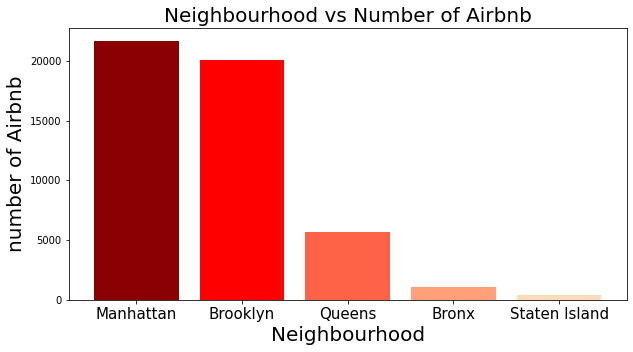

In [16]:
#by using matplotlib libraries we can make are data easy to visualize
neighbourhood = neighbourhood_num_of_bnb['neighbourhood_group']
num_of_bnb = neighbourhood_num_of_bnb['number_of_airbnb']

fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(neighbourhood, num_of_bnb,color = ['darkred','red','tomato','lightsalmon','peachpuff'])



plt.xlabel("Neighbourhood",fontsize=20)
plt.ylabel("number of Airbnb",fontsize=20)
plt.title("Neighbourhood vs Number of Airbnb",fontsize=20)
plt.xticks(fontsize='15')
plt.show()

#**As we can see that in upper bar chart. which tells that more the darker color means more the number of airbnb available in particular neighbourhood.**


1.   Manhattan have 21661 number of Airbnb available. 
2.   Brooklyn have 20104 number of Airbnb available.
3.   Queens have 5666 number of Airbnb available.
4.   Bronx have 1091 number of Airbnb available.
5.   Staten Island have 373 number of Airbnb available.



Getting the number of Airbnb in each neighbourhood along with room type. 

In [17]:
#getting the number of bnb available in each neighbourhood group
num_of_room_diff_neibhourhood = pd.DataFrame(airbnb_df.groupby('neighbourhood_group')['room_type'].value_counts())
num_of_room_diff_neibhourhood

room_type
neighbourhood_group room_type                 
Bronx               Private room           652
                    Entire home/apt        379
                    Shared room             60
Brooklyn            Private room         10132
                    Entire home/apt       9559
                    Shared room            413
Manhattan           Entire home/apt      13199
                    Private room          7982
                    Shared room            480
Queens              Private room          3372
                    Entire home/apt       2096
                    Shared room            198
Staten Island       Private room           188
                    Entire home/apt        176
                    Shared room              9

#**What can we learn from predictions? (ex: locations, prices, reviews, etc)**

Now Grouping neighbourhood with reviews to see which neighbourhood group has more visitors. 

In [18]:
#using groupby on neighbourhood_group and taking max of number of reviews and price. 
neighbourhood_reviews = airbnb_df.groupby(['neighbourhood_group'])['number_of_reviews'].max().reset_index()
neighbourhood_reviews.sort_values(by='number_of_reviews',ascending=False)

,neighbourhood_group,number_of_reviews
3,Queens,629
2,Manhattan,607
1,Brooklyn,488
4,Staten Island,333
0,Bronx,321


Now we can make this data more intuitive using matplotlib library.
We can plot a barplot for better understanding the number of reviews vs locations. 

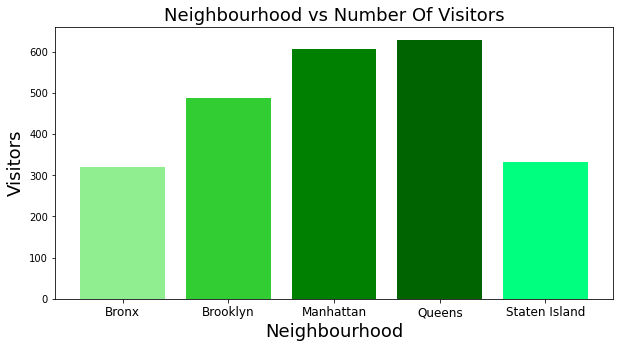

In [19]:
#by using matplotlib libraries we can make are data easy to visualize 
neighbourhoods = neighbourhood_reviews['neighbourhood_group']
reviews = neighbourhood_reviews['number_of_reviews']

fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
color = ['lightgreen','limegreen','green','darkgreen','springgreen']
plt.bar(neighbourhoods, reviews,color=color)

 
plt.xlabel("Neighbourhood",fontsize=18)
plt.ylabel("Visitors",fontsize=18)
plt.title("Neighbourhood vs Number Of Visitors",fontsize=18)
plt.xticks(fontsize='12')
plt.show()

#**In the above chart more the darker shade tells more the number of visitors.**

1.   Queens has most number of visitors which is 629. 
2.   Manhattan has most number of visitors which is 607.
3.   Brooklyn has most number of visitors which is 488.
4.   Staten Island has most number of visitors which is 333.
5.   Bronx has most number of visitors which is 321. 



Now checking the number of visitors on monthly basis.

In [20]:
#Firstly droping the null values then using groupby on neighbourhood_group and taking max of reviews per month and price. 
neighbourhood_reviews_per_month = airbnb_df[~airbnb_df['reviews_per_month'].isna()].groupby(['neighbourhood_group'])['reviews_per_month'].max().reset_index()
neighbourhood_reviews_per_month

,neighbourhood_group,reviews_per_month
0,Bronx,10.34
1,Brooklyn,14.00
2,Manhattan,58.50
3,Queens,20.94
4,Staten Island,10.12


With the help of color arrgument in matplotlib library we are able to understand reviews per month data more easily by ploting bar chart.  

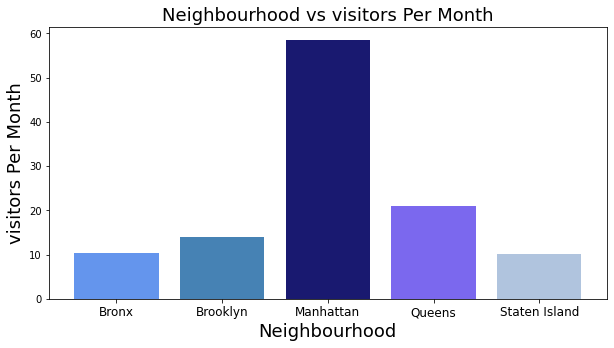

In [21]:
#by using matplotlib libraries we can make are data easy to visualize 
neighbourhoods_for_month = neighbourhood_reviews_per_month['neighbourhood_group']
reviews_per_month = neighbourhood_reviews_per_month['reviews_per_month']

fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
color = ['cornflowerblue','steelblue','midnightblue','mediumslateblue','lightsteelblue']
plt.bar(neighbourhoods_for_month, reviews_per_month,color=color)

 
plt.xlabel("Neighbourhood",fontsize=18)
plt.ylabel("visitors Per Month",fontsize=18)
plt.title("Neighbourhood vs visitors Per Month",fontsize=18)
plt.xticks(fontsize='12')
plt.show()

#**interesting! when we simply counting the visitors throughout the year we found that Queens neighbourhood got more visitors. But when we done our aggregation function on visitors per month. We find that manhattan has more number of visitors per month as compared to Queens and other neighbourhood.**

In [22]:
#getting the last review along with neighbourhood group
airbnb_df.groupby(['neighbourhood_group','last_review'])['reviews_per_month'].max().reset_index().sort_values(by='reviews_per_month',ascending=False).head().set_index('neighbourhood_group')

,last_review,reviews_per_month
neighbourhood_group,,
Manhattan,2019-07-07,58.50
Queens,2019-07-08,20.94
Queens,2019-07-06,19.75
Queens,2019-07-05,15.78
Queens,2019-06-26,15.23


#**The reasons behind why we get Manhattan on top in July month.** 
#**Fourth of July independence day of America. On this day there is a federal holiday across the entire America.**

#**Want to know which neighbourhood has maximum price per night?**

In [23]:
#getting the maximum labeled price airbnb available in different naighbouthood
neighbourhood_prices = airbnb_df[airbnb_df['minimum_nights']==1].groupby(['neighbourhood_group'])['price'].max().reset_index().sort_values(by=['price'])
neighbourhood_prices.head(10)

,neighbourhood_group,price
0,Bronx,1000
3,Queens,2000
4,Staten Island,5000
2,Manhattan,7703
1,Brooklyn,8000


We can plot a barplot for better understanding the neighbourhood_group vs Price.

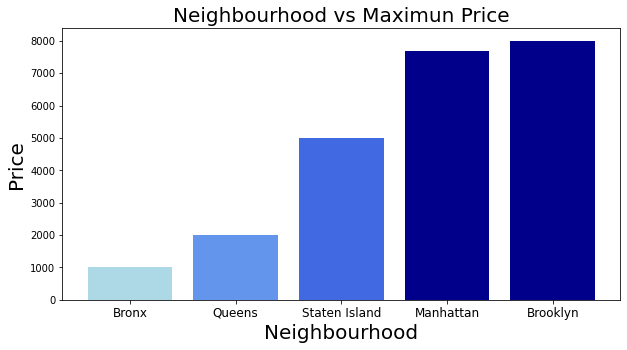

In [24]:
#by using matplotlib libraries we can make are data easy to visualize 
location = neighbourhood_prices['neighbourhood_group']
price = neighbourhood_prices['price']

fig = plt.figure(figsize = (10, 5))
color = ['lightblue','cornflowerblue','royalblue','darkblue','darkblue']
# creating the bar plot
plt.bar(location,price,color=color)
plt.xlabel("Neighbourhood",fontsize=20)
plt.ylabel("Price",fontsize=20)
plt.title("Neighbourhood vs Maximun Price",fontsize=20)
plt.xticks(fontsize='12')
plt.show()

#**. From this above result we can see that Brooklyn and Manhattan neighbourhood groups has maximum price tagged Airbnb.**
#**. The staten island has low price as compared to Brooklyn and Manhattan. But higher than Bronx and Queens Neighbourhood_group.**
#**. The Bronx has low price as compared to others.**

#**Lets find out minimum price per night?**
Checking the lowest price tagged Airbnb in different neighbourhood

In [25]:
#droping null values from price column in airbnb dataframe
airbnb_df[~airbnb_df['price'].isna()].groupby('neighbourhood_group')[['minimum_nights','price']].min()

,minimum_nights,price
neighbourhood_group,,
Bronx,1,0
Brooklyn,1,0
Manhattan,1,0
Queens,1,10
Staten Island,1,13


#**Bronx, Brooklyn and Manhattan has showes their lowest price airbnb as zero. Why?**


1.  there might be a mistake by the person who work to record the entries.



Getting those rows where price is more that zero. So Simply apply Condition on our dataframe where price should be more than zero. 

In [26]:
#using conditon on airbnb dataset.
min_price_airbnb = airbnb_df[airbnb_df['price']>0].groupby('neighbourhood_group')[['minimum_nights','price']].min().reset_index()
min_price_airbnb

,neighbourhood_group,minimum_nights,price
0,Bronx,1,10
1,Brooklyn,1,10
2,Manhattan,1,10
3,Queens,1,10
4,Staten Island,1,13


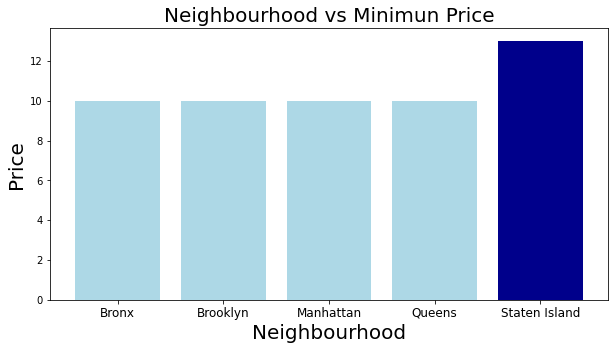

In [27]:
#by using matplotlib libraries we can make are data easy to visualize 
location = min_price_airbnb['neighbourhood_group']
price = min_price_airbnb['price']

fig = plt.figure(figsize = (10, 5))
color = ['lightblue','lightblue','lightblue','lightblue','darkblue']
# creating the bar plot
plt.bar(location,price,color=color)
plt.xlabel("Neighbourhood",fontsize=20)
plt.ylabel("Price",fontsize=20)
plt.title("Neighbourhood vs Minimun Price",fontsize=20)
plt.xticks(fontsize='12')
plt.show()

#**Which hosts are the busiest and why?**







In [28]:
#using groupby on host_name,room_type and neighbourhood_group with respect to maximun number of reviews
busiest_host = airbnb_df.groupby(['host_name','room_type','neighbourhood_group'])['number_of_reviews'].max().reset_index().rename(columns={'number_of_reviews':'number_of_booking'})

Getting top 10 hosts who are most busiest as compared to the other hosts.

In [29]:
#sort by number of bookings
top_10_busiest_host = busiest_host.sort_values(by='number_of_booking',ascending=False).head(10)
top_10_busiest_host

,host_name,room_type,neighbourhood_group,number_of_booking
4598,Dona,Private room,Queens,629
8445,Jj,Private room,Manhattan,607
12044,Maya,Private room,Queens,543
2869,Carol,Private room,Manhattan,540
3988,Danielle,Private room,Queens,510
1637,Asa,Entire home/apt,Brooklyn,488
18272,Wanda,Private room,Brooklyn,480
10578,Linda,Private room,Queens,474
3935,Dani,Entire home/apt,Brooklyn,467
1179,Angela,Private room,Queens,466


Using Top_10_busiest_host dataframe we can plot a bar chart to better understand and visualize the data to know how many bookings got the top hosts.

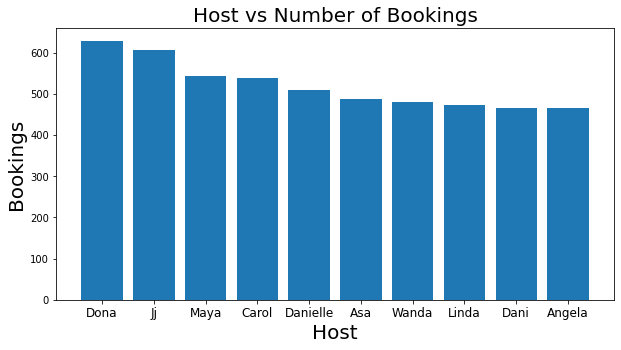

In [30]:
#by using matplotlib libraries we can make are data easy to visualize 
top_10_hosts_name = top_10_busiest_host['host_name']
num_booking = top_10_busiest_host['number_of_booking']

fig = plt.figure(figsize = (10, 5))

# creating the bar plot
plt.bar(top_10_hosts_name,num_booking)
plt.xlabel("Host",fontsize=20)
plt.ylabel("Bookings",fontsize=20)
plt.title("Host vs Number of Bookings",fontsize=20)
plt.xticks(fontsize='12')
plt.show()

#**The following hosts are the busiest host.**
1. Dona   
2. Jj
3. Maya
4. Carol
5. Danielle






#**Want to Know why these host are busiest?**
By doing simply value_counts on room type to know the similarity of room type. which the busiest host provide.

In [31]:
#performing the value_count() function on room_type column
pd.DataFrame(top_10_busiest_host['room_type'].value_counts())

,room_type
Private room,8
Entire home/apt,2


As we can see the above code output which shows us that, majorly hosts have "Private Room" as room_type . which people prefer more.   

Now, getting the top 5 hosts minimum price offer in different locations/neighbourhoods along with room type.

In [32]:
#getting the top 5 hosts location and minimum offering price for different room type 
top_5_hosts_df = airbnb_df[(airbnb_df.loc[:,'host_name']=='Dona') | (airbnb_df.loc[:,'host_name']=='Jj') | (airbnb_df.loc[:,'host_name']=='Maya') | (airbnb_df.loc[:,'host_name']=='Carol') | (airbnb_df.loc[:,'host_name']=='Danielle')]

In [33]:
top_5_hosts_min_price_df =top_5_hosts_df.groupby(['host_name','price','room_type','neighbourhood_group'])['minimum_nights'].min().reset_index().sort_values(by=['minimum_nights','price']).set_index('host_name').reset_index().loc[[0,1,2,7,11]]
top_5_hosts_min_price_df

,host_name,price,room_type,neighbourhood_group,minimum_nights
0,Maya,32,Private room,Queens,1
1,Carol,35,Private room,Brooklyn,1
2,Danielle,38,Shared room,Queens,1
7,Dona,47,Private room,Queens,1
11,Jj,49,Private room,Manhattan,1


#**The minimun Price offer by top 5 hosts in different neighbourhood areas are as follows:**
1.   Maya offers private room in Queens neighbourhood at price 32 per night.
2.   Carol offers private room in Brooklyn neighbourhood at price 35 per night.
3.   Danielle offers private room in Queens neighbourhood at price 38 per night.
4.   Dona offers private room in Queens neighbourhood at price 47 per night.
5.   Jj offers private room in Manhattan neighbourhood at price 49 per night.



#**Is there any noticeable difference of traffic among different areas and what could be the reason for it?**   




#**In ode to know the traffic areas we have to mainly look into three columns. which are as follows:-**


1.   Neighbourhood group
2.   Room type
3.   Minimum nights



In [34]:
#getting the most traffic neighbourhood
trafic_areas_df = airbnb_df.groupby('neighbourhood_group')['minimum_nights'].count().reset_index().sort_values(by='minimum_nights',ascending=False)
trafic_areas_df

,neighbourhood_group,minimum_nights
2,Manhattan,21661
1,Brooklyn,20104
3,Queens,5666
0,Bronx,1091
4,Staten Island,373


For better understanding the outcome result we use matplotlib package for ploting a bar chart. 

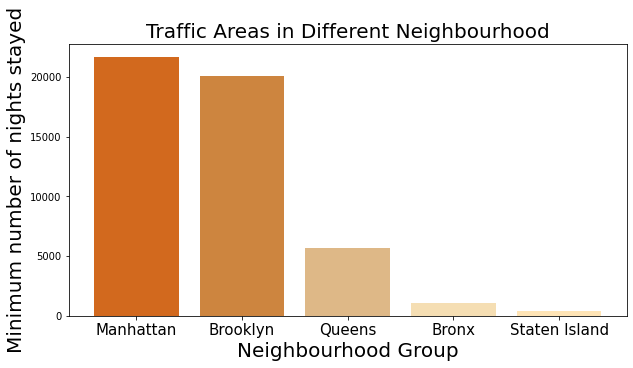

In [35]:
#by using matplotlib libraries we can make are data easy to visualize 
neighbourhood_type = trafic_areas_df['neighbourhood_group']
min_nights = trafic_areas_df['minimum_nights']

fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
c = ['chocolate','peru','burlywood','wheat','moccasin']
plt.bar(neighbourhood_type, min_nights,color=c)


plt.xlabel("Neighbourhood Group",fontsize=20)
plt.ylabel("Minimum number of nights stayed",fontsize=20)
plt.title("Traffic Areas in Different Neighbourhood",fontsize=20)
plt.xticks(fontsize='15')
plt.show()

#**Want to know what kind of room type people prefer in traffic area like manhattan?**

In [36]:
#groupby on neighbourhood_group and room_type with aggregation on ninimun_nights 
traffic_among_diff_areas = airbnb_df.groupby(['neighbourhood_group','room_type'])['minimum_nights'].count().reset_index()
traffic_among_diff_areas = traffic_among_diff_areas.sort_values(by='minimum_nights', ascending=False)
traffic_among_diff_areas

,neighbourhood_group,room_type,minimum_nights
6,Manhattan,Entire home/apt,13199
4,Brooklyn,Private room,10132
3,Brooklyn,Entire home/apt,9559
7,Manhattan,Private room,7982
10,Queens,Private room,3372
9,Queens,Entire home/apt,2096
1,Bronx,Private room,652
8,Manhattan,Shared room,480
5,Brooklyn,Shared room,413
0,Bronx,Entire home/apt,379


In [37]:
#getting only room_type and minimun_nights data
room_type_vs_night = traffic_among_diff_areas[traffic_among_diff_areas['neighbourhood_group']=='Manhattan'].groupby('room_type')['minimum_nights'].sum().reset_index()
room_type_vs_night

,room_type,minimum_nights
0,Entire home/apt,13199
1,Private room,7982
2,Shared room,480


Getting the room type and nights data for ploting the bar chart for easy visualize and understanding.

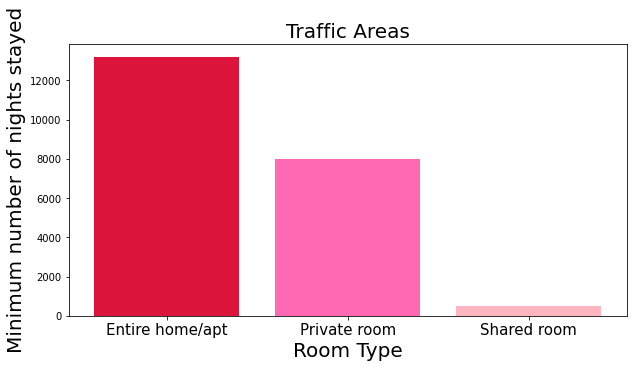

In [38]:
#by using matplotlib libraries we can make are data easy to visualize 
room_type = room_type_vs_night['room_type']
stayed = room_type_vs_night['minimum_nights']

fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
c = ['crimson','hotpink','lightpink']
plt.bar(room_type, stayed,color=c)


plt.xlabel("Room Type",fontsize=20)
plt.ylabel("Minimum number of nights stayed",fontsize=20)
plt.title("Traffic Areas",fontsize=20)
plt.xticks(fontsize='15')
plt.show()

#**In the upper bar chart we can say that from our analysis that 'Entire home/apt' room type has more demanding in traffic areas as compare to 'private room' and 'shared room'.**
#**At the other hand we can see that 'shared room' people does't prefer ,beacuse people does't want to share his/her privacy with others.**

#**Following are the reason behind the above chart:-**


1.  Entire home/apartment room type usually booked by family and who has travel for short business trip along with family.
2.   Private room type usually booked by bachelor's and travellers who don't wanted to share privacy with others.
3.   Shared room type mostly booked by students, who does't earn much and don't wanted to spend much price for stay.




---



#**Conclusion**

1.   Manhattan neighbourhood has the most listed Airbnb as compared to others.
2.   Queens has most number of visitors which means people visited more here.
4.   In the month of july people vitisted more in manhattan.
4.   Brooklyn and Manhattan has maximum price which costs more than 5000 because of metropolitan city.
5.   Bronx neighbourhood has their maximum price Airbnb which costs 1000 per night.
6.   The top 5 host has listed their airbnb which has room type as private.
7.   The major traffic areas are where room type as entire home/apartment and private room.
8.   peoples doesn't like to stay in shared room airbnb.
9.   The demand of Airbnb is too high in Manhattan and Queens neighbourhoods.
10.   In Staten Island the demand of Airbnb is too low as compared to other neighbourhoods.
11.  In Staten Island neighbourhood the pricing of the Airbnb is quit high. Therefor people doesn't book Airbnb there.
12.  In staten Island neighbourhood the lowest price tagged Airbnb 13$ is little bit higher than other neighbourhoods and maximum price for single night is 5000. 
13. It would be better to record the reviews on the scale of 0 to 5. It will help to identify the hosts whose services are better.





---


#**Thanks** 


